## Model no 5

Target:
+ life_ladder  

Features:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth
+ freedom_to_make_life_choices
+ perception of corruption
+ positive affect

import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 

In [7]:
sns.set_style("darkgrid")

model_name = 'model_05'

function section

In [8]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [9]:
df = pd.read_csv("../data/life_ladder_2005_2022_no5_gdp_sosupp_lifeexp_free_corrupt_affect.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1993 non-null   object 
 1   year                              1993 non-null   int64  
 2   life_ladder                       1993 non-null   float64
 3   log_gdp_per_capita                1993 non-null   float64
 4   social_support                    1993 non-null   float64
 5   healthy_life_expectancy_at_birth  1993 non-null   float64
 6   freedom_to_make_life_choices      1993 non-null   float64
 7   perceptions_of_corruption         1993 non-null   float64
 8   positive_affect                   1993 non-null   float64
 9   negative_affect                   1993 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 155.8+ KB


Define features and Target:

In [11]:
features = df.columns.tolist()
features.remove('country_name')
features.remove('year')
features.remove('life_ladder')
features.remove('negative_affect')

X = df[features]
y = df['life_ladder']

In [12]:
X.columns

Index(['log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'positive_affect'],
      dtype='object')

In [13]:
print(X.shape, y.shape)

(1993, 6) (1993,)


Train-Test-Split:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1395, 6) (598, 6) (1395,) (598,)


In [16]:
X_train.describe()

,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000
mean,9.346158,0.808794,63.204047,0.749614,0.746466,0.655426
std,1.149112,0.121564,6.934678,0.136645,0.183435,0.104993
min,5.527000,0.290000,6.720000,0.304000,0.035000,0.308000
25%,8.448000,0.741000,58.712500,0.660000,0.692500,0.573000
50%,9.497000,0.836000,64.900000,0.770000,0.798000,0.668000
75%,10.282000,0.904000,68.525000,0.857500,0.867000,0.741000
max,11.664000,0.985000,74.475000,0.985000,0.983000,0.884000


Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scatterplot with scaled and non-scaled data, both features (correlation)

In [18]:
X_train_scaled.shape

(1395, 6)

In [19]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

<Axes: xlabel='positive_affect', ylabel='life_ladder'>

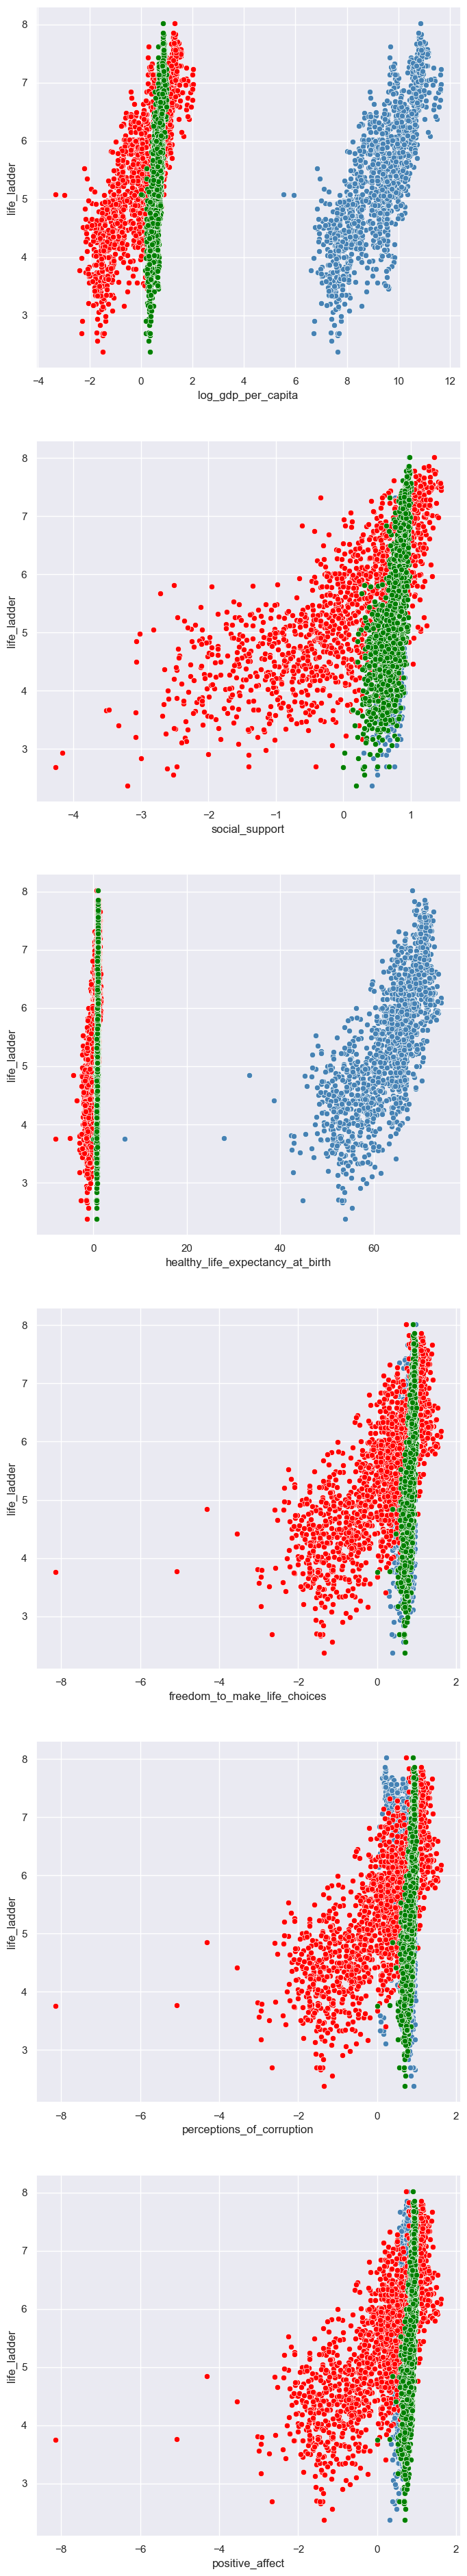

In [48]:
fig,ax = plt.subplots(6,1,figsize=(8,48))
sns.scatterplot(ax= ax[0], x = X_train.log_gdp_per_capita, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[0], x = X_train_scaled[:,0], y = y_train, color = 'red')
sns.scatterplot(ax= ax[0], x = X_train_normalized[:,0], y = y_train, color = 'green')
sns.scatterplot(ax= ax[1], x = X_train.social_support, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[1], x = X_train_scaled[:,1], y = y_train, color = 'red')
sns.scatterplot(ax= ax[1], x = X_train_normalized[:,1], y = y_train, color = 'green')
sns.scatterplot(ax= ax[2], x = X_train.healthy_life_expectancy_at_birth, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[2], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[2], x = X_train_normalized[:,2], y = y_train, color = 'green')
sns.scatterplot(ax= ax[3], x = X_train.freedom_to_make_life_choices, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[3], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[3], x = X_train_normalized[:,2], y = y_train, color = 'green')
sns.scatterplot(ax= ax[4], x = X_train.perceptions_of_corruption, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[4], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[4], x = X_train_normalized[:,2], y = y_train, color = 'green')
sns.scatterplot(ax= ax[5], x = X_train.positive_affect, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[5], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[5], x = X_train_normalized[:,2], y = y_train, color = 'green')

Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [55]:
lin_reg_error_lst = []

for i in range(1,5):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train_scaled)
    x_poly_test = polynomial_features.transform(X_test_scaled)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    rmse_test = mean_squared_error(y_test, y_pred_poly_test, squared=False).round(3)
    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test_scaled).round(3)
    rmse_train = mean_squared_error(y_train, y_pred_poly_train, squared=False).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train_scaled).round(3)
    
    mae_test = mean_absolute_error(y_test, y_pred_poly_test).round(3)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_poly_test).round(3)
    mae_train = mean_absolute_error(y_train, y_pred_poly_train).round(3)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_poly_train).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    delta_mae = abs(mae_train - mae_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
1,model_05_lin_reg_2,0.496,0.809,0.383,0.077,0.515,0.799,0.392,0.080,0.019,0.009,0.010
0,model_05_lin_reg_1,0.541,0.773,0.414,0.083,0.532,0.786,0.405,0.082,0.009,0.009,0.013
2,model_05_lin_reg_3,0.463,0.834,0.356,0.071,0.514,0.800,0.395,0.080,0.051,0.039,0.034
3,model_05_lin_reg_4,0.403,0.874,0.305,0.060,0.797,0.519,0.467,0.102,0.394,0.162,0.355


lin_reg_sc = LinearRegression()
lin_reg_sc.fit(X_train_scaled,y_train)

y_pred_linreg_test = lin_reg_sc.predict(X_test_normalized)
y_pred_linreg_train = lin_reg_sc.predict(X_train_normalized)

rmse_test = mean_squared_error(y_test, y_pred_linreg_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_linreg_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_linreg_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_linreg_train, X_train).round(3)

delta_rmse = abs(rmse_train - rmse_test)
delta_r2 = abs(r2_train - r2_test)

lin_reg_error_lst.append({'model_name': model_name + '_lin_reg_scaled', 
                        'train_rmse': rmse_train, 
                        'train_r2':r2_train, 
                        'test_rmse': rmse_test, 
                        'test_r2':r2_test,
                        'delta_RMSE':delta_rmse,
                        'delta_R2':delta_r2})

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_22346/1933425063.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


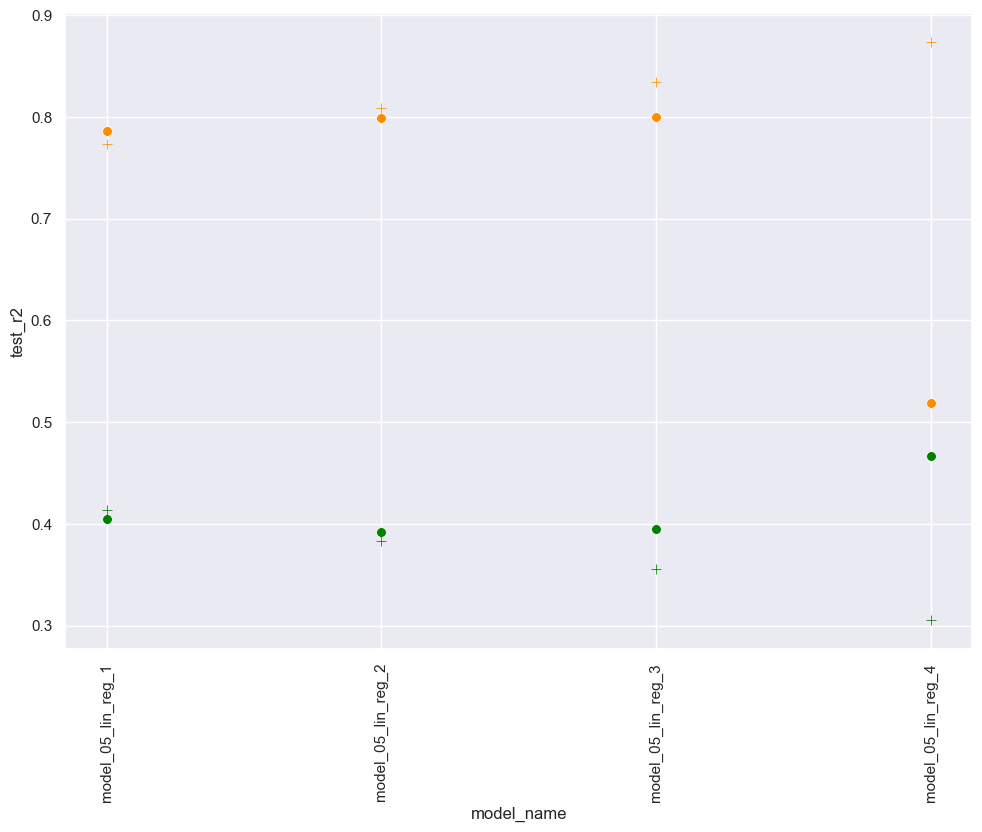

In [56]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [57]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_05_lin_reg_scaler_0,0.769
1,model_05_lin_reg_scaler_1,0.769
2,model_05_lin_reg_scaler_2,0.769


part df with the best models:

In [58]:
part_lin_reg = lin_reg_error_df.sort_values(by =['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:3]
part_lin_reg

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
2,model_05_lin_reg_3,0.463,0.834,0.356,0.071,0.514,0.800,0.395,0.080,0.051,0.039,0.034
1,model_05_lin_reg_2,0.496,0.809,0.383,0.077,0.515,0.799,0.392,0.080,0.019,0.009,0.010
0,model_05_lin_reg_1,0.541,0.773,0.414,0.083,0.532,0.786,0.405,0.082,0.009,0.009,0.013


---

### KNN Model 

+ with variable number of neighbors and variable distance metrics
+ unscaled!! - now with standart scaler

In [63]:
knn_error_lst = []
for metr in range(1,4):
    for neigh in np.arange(45,91,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr, weights='uniform')
        knn.fit(X_train_scaled, y_train)

        y_pred_knn_test = knn.predict(X_test_scaled)
        y_pred_knn_train = knn.predict(X_train_scaled)
        rmse_test = mean_squared_error(y_test, y_pred_knn_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test_scaled).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_knn_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train_scaled).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_knn_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_knn_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_knn_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_knn_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_knn_' + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
#knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])
#knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_05_knn_1_45,0.486,0.817,0.375,0.077,0.514,0.800,0.386,0.080,0.028,0.011,0.017
3,model_05_knn_1_60,0.497,0.808,0.384,0.079,0.518,0.797,0.387,0.080,0.021,0.003,0.011
1,model_05_knn_1_50,0.491,0.813,0.379,0.078,0.516,0.799,0.387,0.080,0.025,0.008,0.014
4,model_05_knn_1_65,0.501,0.805,0.387,0.079,0.520,0.795,0.388,0.080,0.019,0.001,0.010
2,model_05_knn_1_55,0.494,0.810,0.381,0.078,0.518,0.797,0.388,0.080,0.024,0.007,0.013
12,model_05_knn_2_55,0.504,0.803,0.388,0.079,0.519,0.796,0.389,0.081,0.015,0.001,0.007
20,model_05_knn_3_45,0.502,0.805,0.386,0.079,0.518,0.797,0.389,0.080,0.016,0.003,0.008
10,model_05_knn_2_45,0.496,0.809,0.382,0.078,0.516,0.798,0.389,0.080,0.020,0.007,0.011
21,model_05_knn_3_50,0.507,0.801,0.390,0.080,0.520,0.796,0.390,0.081,0.013,0.000,0.005
5,model_05_knn_1_70,0.504,0.803,0.389,0.080,0.523,0.793,0.390,0.081,0.019,0.001,0.010


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_22346/1622020098.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


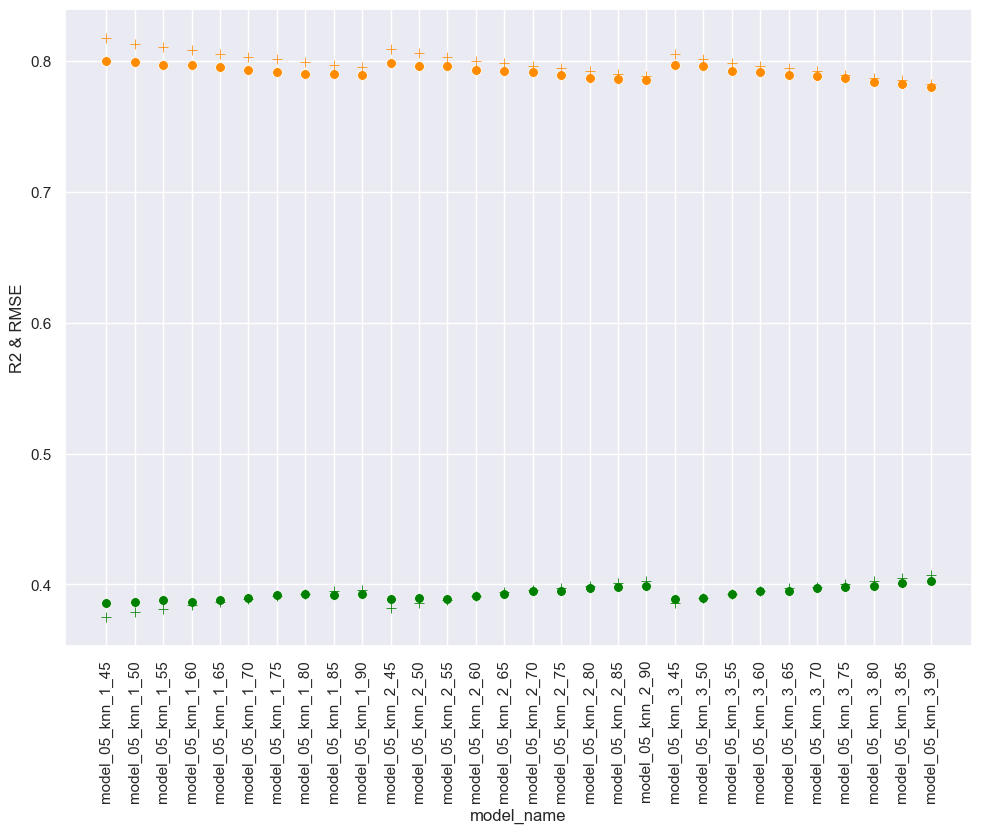

In [64]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [66]:
#part_knn = knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:5]
#part_knn = knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
part_knn = knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
#part_knn = knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:6]
part_knn

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
21,model_05_knn_3_50,0.507,0.801,0.390,0.080,0.520,0.796,0.390,0.081,0.013,0.000,0.005
13,model_05_knn_2_60,0.508,0.800,0.391,0.080,0.522,0.793,0.391,0.081,0.014,0.000,0.007
7,model_05_knn_1_80,0.509,0.799,0.393,0.081,0.526,0.790,0.393,0.081,0.017,0.000,0.009
22,model_05_knn_3_55,0.510,0.798,0.393,0.080,0.524,0.792,0.393,0.081,0.014,0.000,0.006
23,model_05_knn_3_60,0.513,0.796,0.395,0.081,0.526,0.791,0.395,0.082,0.013,0.000,0.005
4,model_05_knn_1_65,0.501,0.805,0.387,0.079,0.520,0.795,0.388,0.080,0.019,0.001,0.010


scaling data

In [67]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 40, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
1,model_05_knn_scaler_1,0.803
2,model_05_knn_scaler_2,0.796
0,model_05_knn_scaler_0,0.756


Decision Tree Model

In [29]:
dtree = DecisionTreeRegressor(max_depth = 5, 
                            max_leaf_nodes = 10)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10)

In [30]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

train_rmse  0.532
train_r2  0.78
train_mae  0.421
train_mape  0.084
test_rmse  0.578
test_r2  0.747
test_mae  0.44
test_mape  0.089


In [31]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

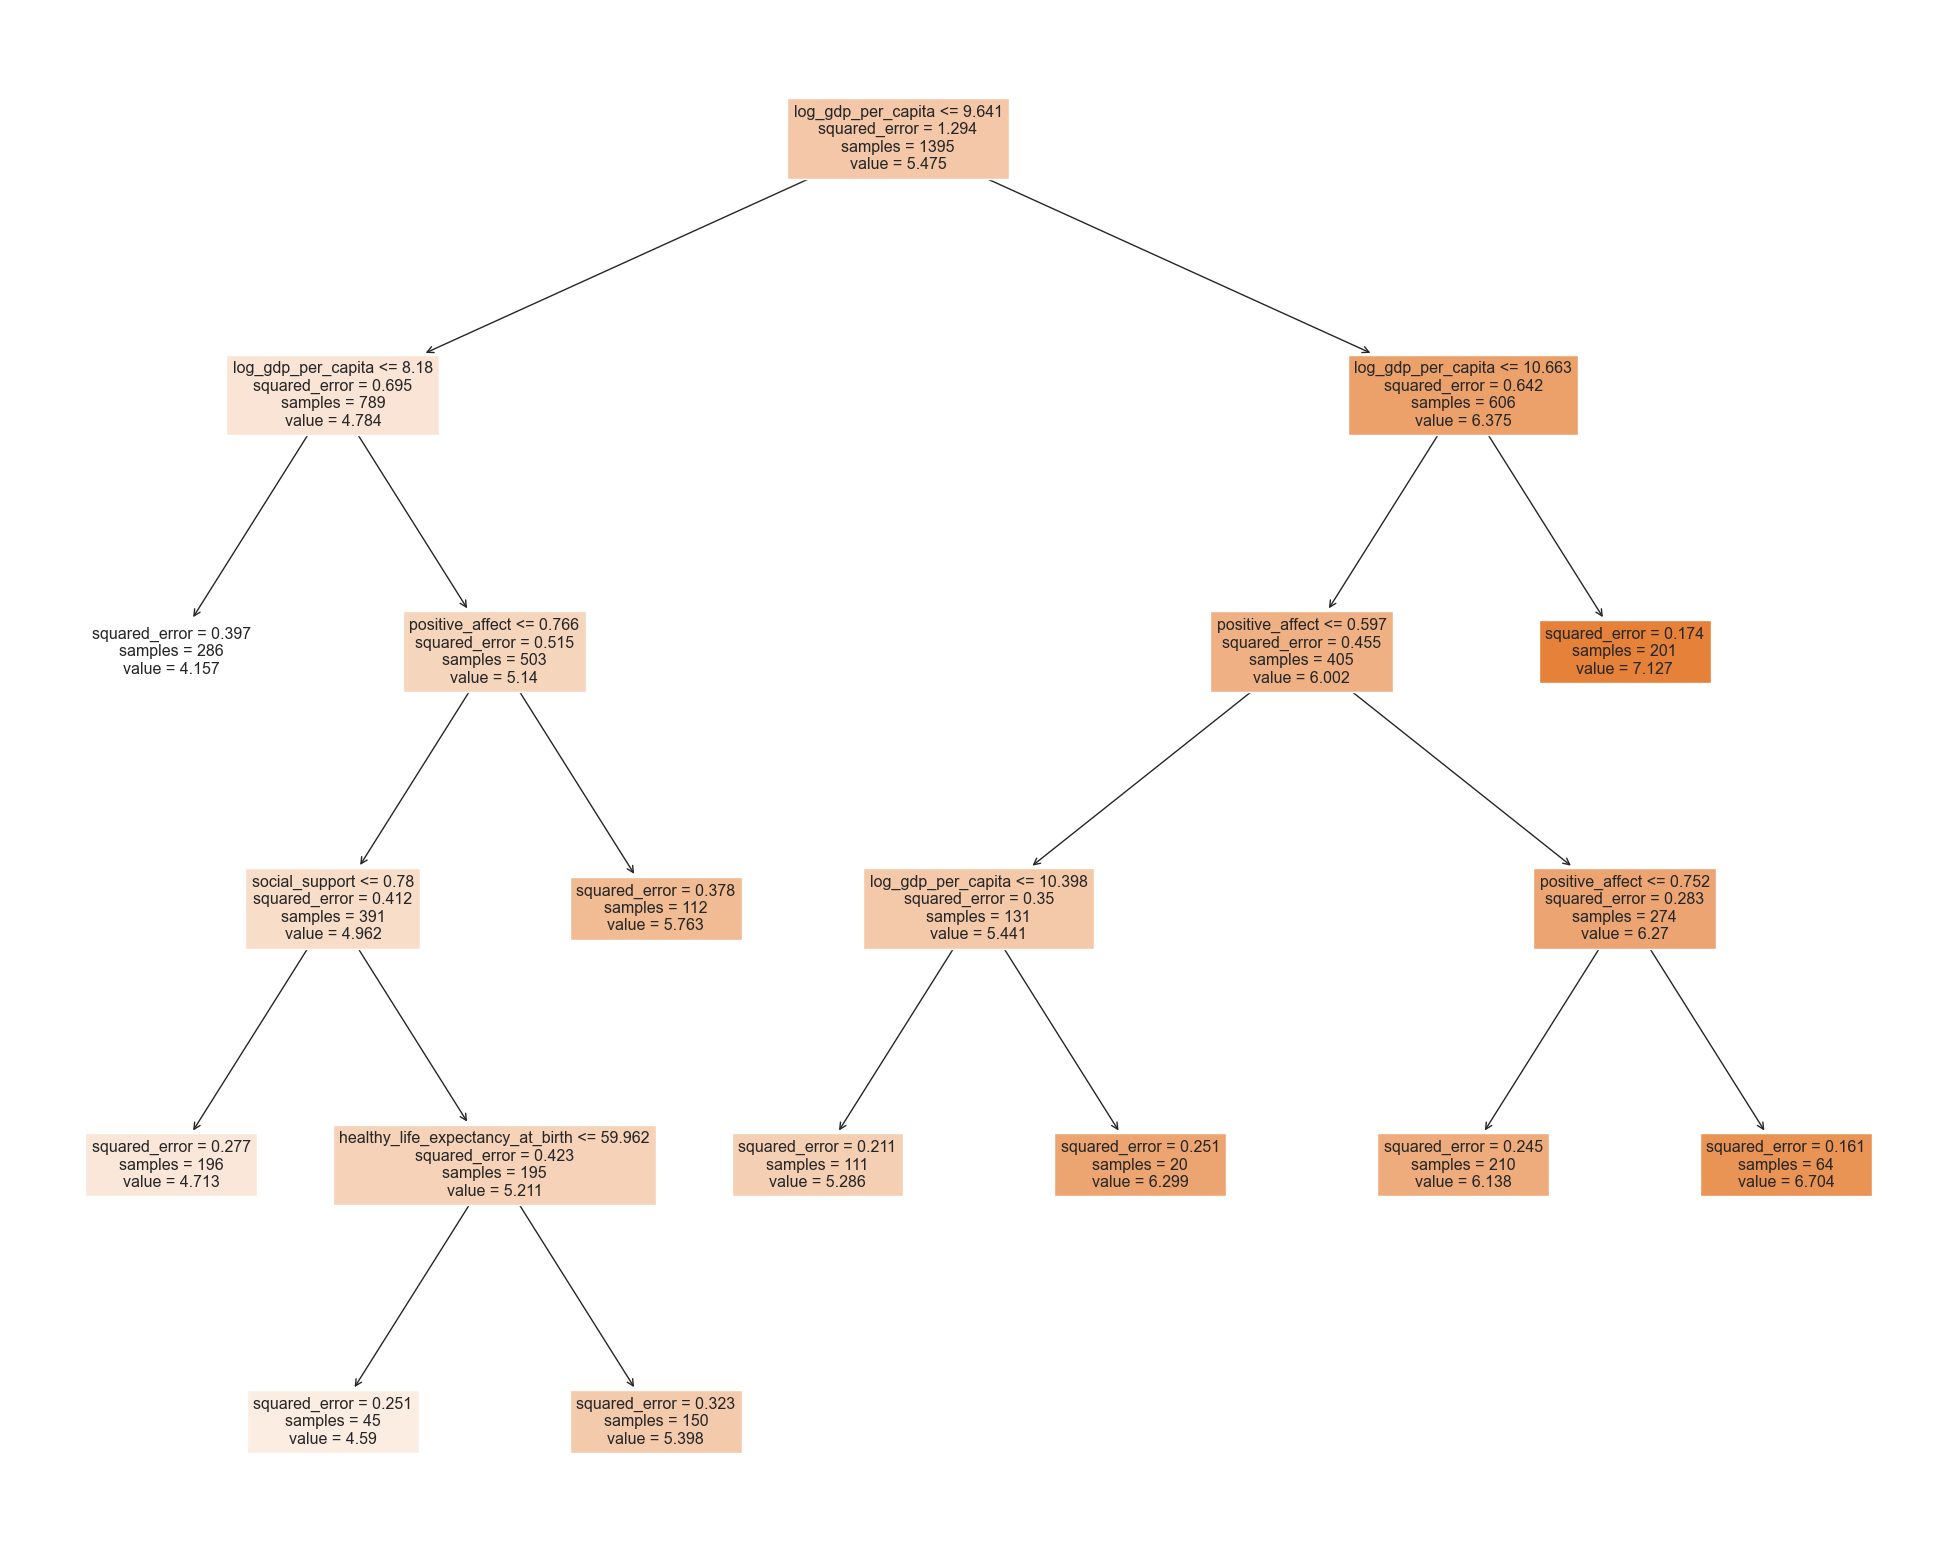

In [32]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [75]:
dectree_error_lst = []
for depth in np.arange(5,8,1):
    for leaf in np.arange(10,21,5): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
#dectree_error_df.sort_values(by = ['delta_R2', 'test_r2'] , ascending=[True, False])
#dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])
dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#dectree_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_05_dectree_dep_5_max_leaf_10,0.532,0.780,0.421,0.084,0.578,0.747,0.440,0.089,0.046,0.019,0.033
3,model_05_dectree_dep_6_max_leaf_10,0.532,0.780,0.421,0.084,0.578,0.747,0.440,0.089,0.046,0.019,0.033
6,model_05_dectree_dep_7_max_leaf_10,0.532,0.780,0.421,0.084,0.578,0.747,0.440,0.089,0.046,0.019,0.033
5,model_05_dectree_dep_6_max_leaf_20,0.475,0.825,0.370,0.074,0.524,0.792,0.402,0.080,0.049,0.032,0.033
1,model_05_dectree_dep_5_max_leaf_15,0.491,0.813,0.384,0.077,0.552,0.769,0.417,0.085,0.061,0.033,0.044
4,model_05_dectree_dep_6_max_leaf_15,0.491,0.813,0.384,0.077,0.552,0.769,0.417,0.085,0.061,0.033,0.044
7,model_05_dectree_dep_7_max_leaf_15,0.491,0.813,0.384,0.077,0.552,0.769,0.417,0.085,0.061,0.033,0.044
2,model_05_dectree_dep_5_max_leaf_20,0.476,0.824,0.371,0.074,0.529,0.788,0.406,0.081,0.053,0.035,0.036
8,model_05_dectree_dep_7_max_leaf_20,0.474,0.826,0.370,0.074,0.551,0.770,0.415,0.084,0.077,0.045,0.056


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_22346/2885455363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


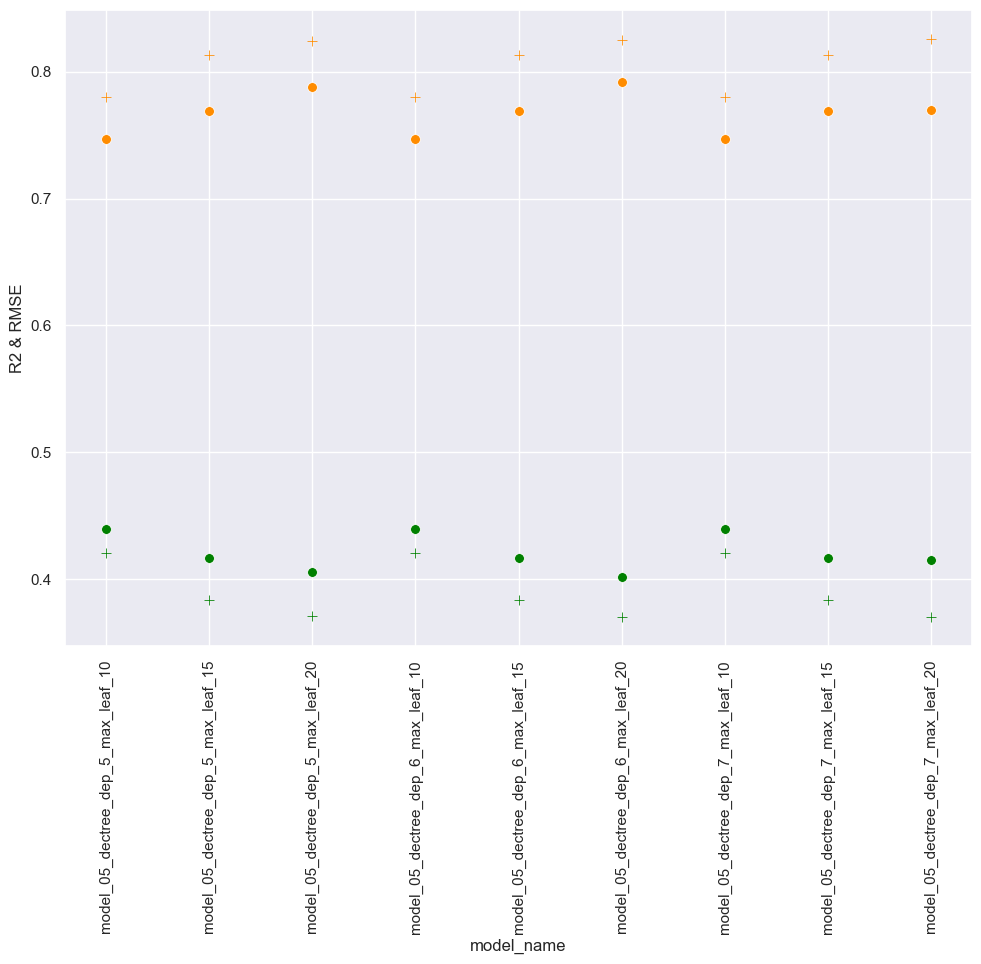

In [76]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

part df for the best models:

In [77]:
#part_dec_tree = dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:6]
#part_dec_tree = dectree_error_df.sort_values(by = ['delta_R2', 'test_r2'] , ascending=[True, False]).iloc[:6]
part_dec_tree = dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_dec_tree

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_05_dectree_dep_5_max_leaf_10,0.532,0.780,0.421,0.084,0.578,0.747,0.440,0.089,0.046,0.019,0.033
3,model_05_dectree_dep_6_max_leaf_10,0.532,0.780,0.421,0.084,0.578,0.747,0.440,0.089,0.046,0.019,0.033
6,model_05_dectree_dep_7_max_leaf_10,0.532,0.780,0.421,0.084,0.578,0.747,0.440,0.089,0.046,0.019,0.033
5,model_05_dectree_dep_6_max_leaf_20,0.475,0.825,0.370,0.074,0.524,0.792,0.402,0.080,0.049,0.032,0.033
1,model_05_dectree_dep_5_max_leaf_15,0.491,0.813,0.384,0.077,0.552,0.769,0.417,0.085,0.061,0.033,0.044
4,model_05_dectree_dep_6_max_leaf_15,0.491,0.813,0.384,0.077,0.552,0.769,0.417,0.085,0.061,0.033,0.044


Random Forest 

In [36]:
randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 4,
                                max_leaf_nodes = 20,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_randforest_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_randforest_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_randforest_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_randforest_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Min number of nodes: 27
Average number of nodes: 30
Max number of nodes: 31
Min maximum depth: 4
Average maximum depth: 4
Max maximum depth: 4
Number of Trees: 100
train_rmse  0.468
train_r2  0.83
train_mae  0.361
train_mape  0.073
test_rmse  0.513
test_r2  0.801
test_mae  0.383
test_mape  0.078


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [37]:
randforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 20,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [82]:
random_trees_error_lst = []
for tree_depth in np.arange(4,7,1):
    for tree_leaf in np.arange(10,41,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_random_forest_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_random_forest_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_random_forest_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_random_forest_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2,
                      'mean_node_num': mean_node_num,
                      'mean_depth': mean_depth,
                      'num_of_trees': num_of_trees}) 
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_05_forest_tree_depth4_max_leaf_10,0.490,0.814,0.378,0.077,0.530,0.787,0.397,0.082,0.040,0.019,0.027,19,4,100
1,model_05_forest_tree_depth4_max_leaf_15,0.469,0.829,0.362,0.073,0.513,0.801,0.384,0.078,0.044,0.022,0.028,28,4,100
7,model_05_forest_tree_depth5_max_leaf_10,0.491,0.813,0.378,0.077,0.532,0.785,0.400,0.082,0.041,0.022,0.028,19,4,100
14,model_05_forest_tree_depth6_max_leaf_10,0.491,0.813,0.378,0.077,0.532,0.785,0.400,0.082,0.041,0.022,0.028,19,4,100
2,model_05_forest_tree_depth4_max_leaf_20,0.468,0.830,0.361,0.073,0.513,0.801,0.383,0.078,0.045,0.022,0.029,30,4,100
3,model_05_forest_tree_depth4_max_leaf_25,0.468,0.830,0.361,0.073,0.513,0.801,0.383,0.078,0.045,0.022,0.029,30,4,100
4,model_05_forest_tree_depth4_max_leaf_30,0.468,0.830,0.361,0.073,0.513,0.801,0.383,0.078,0.045,0.022,0.029,30,4,100
5,model_05_forest_tree_depth4_max_leaf_35,0.468,0.830,0.361,0.073,0.513,0.801,0.383,0.078,0.045,0.022,0.029,30,4,100
6,model_05_forest_tree_depth4_max_leaf_40,0.468,0.830,0.361,0.073,0.513,0.801,0.383,0.078,0.045,0.022,0.029,30,4,100
8,model_05_forest_tree_depth5_max_leaf_15,0.466,0.832,0.360,0.073,0.513,0.801,0.385,0.079,0.047,0.025,0.031,29,5,100


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_22346/4267177350.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


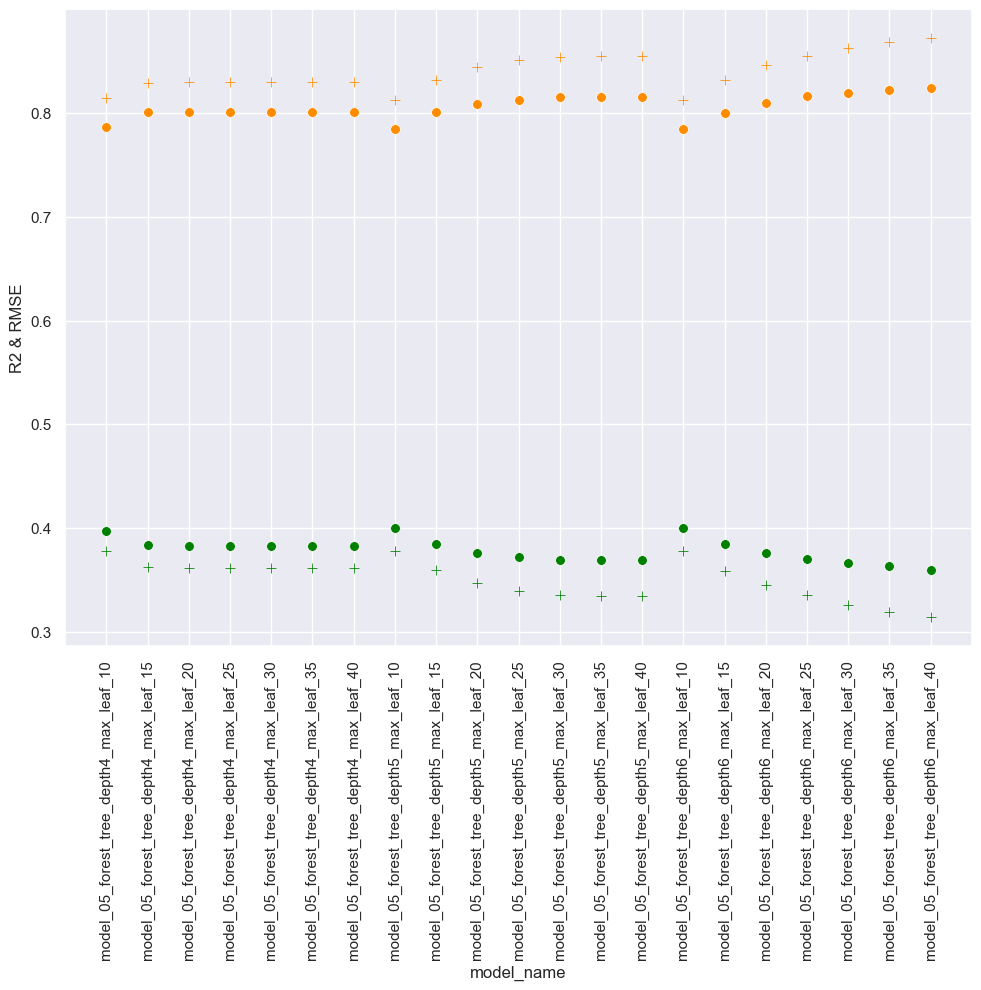

In [84]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [85]:
#part_forest = random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:4]
part_forest = random_trees_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
part_forest

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_05_forest_tree_depth4_max_leaf_10,0.490,0.814,0.378,0.077,0.530,0.787,0.397,0.082,0.040,0.019,0.027,19,4,100
1,model_05_forest_tree_depth4_max_leaf_15,0.469,0.829,0.362,0.073,0.513,0.801,0.384,0.078,0.044,0.022,0.028,28,4,100
7,model_05_forest_tree_depth5_max_leaf_10,0.491,0.813,0.378,0.077,0.532,0.785,0.400,0.082,0.041,0.022,0.028,19,4,100
14,model_05_forest_tree_depth6_max_leaf_10,0.491,0.813,0.378,0.077,0.532,0.785,0.400,0.082,0.041,0.022,0.028,19,4,100
2,model_05_forest_tree_depth4_max_leaf_20,0.468,0.830,0.361,0.073,0.513,0.801,0.383,0.078,0.045,0.022,0.029,30,4,100
3,model_05_forest_tree_depth4_max_leaf_25,0.468,0.830,0.361,0.073,0.513,0.801,0.383,0.078,0.045,0.022,0.029,30,4,100


Test: AdaBoostRegressor

In [86]:
ada = AdaBoostRegressor(n_estimators=50, random_state=8)
ada.fit(X_train, y_train)

y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                    'train_rmse': mean_squared_error(y_train, y_pred_ada_train, squared=False).round(3), 
                    'train_r2':r2_score(y_train, y_pred_ada_train).round(3), 
                    'train_mae': mean_absolute_error(y_train, y_pred_ada_train).round(3),
                    'train_mape': mean_absolute_percentage_error(y_train, y_pred_ada_train).round(3),
                    'test_rmse': mean_squared_error(y_test, y_pred_ada_test, squared=False).round(3), 
                    'test_r2':r2_score(y_test, y_pred_ada_test).round(3),
                    'test_mae': mean_absolute_error(y_test, y_pred_ada_test).round(3),
                    'test_mape': mean_absolute_percentage_error(y_test, y_pred_ada_test).round(3)
                    }])

ada_boost_error['delta_RMSE'] = abs(ada_boost_error['train_rmse'] - ada_boost_error['test_rmse'])
ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error['delta_MAE'] = abs(ada_boost_error['train_mae'] - ada_boost_error['test_mae'])
ada_boost_error

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_R2,delta_MAE
0,model_05_ada_boost,0.483,0.82,0.399,0.079,0.538,0.783,0.423,0.084,0.055,0.037,0.024


that is really nice!!

In [42]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 8}

Test:  GradientBoostingRegressor

In [87]:
gbr = GradientBoostingRegressor(n_estimators=50,
                                criterion= 'squared_error',
                                max_depth = 4, 
                                max_leaf_nodes = 14,
                                random_state=123)
gbr.fit(X_train, y_train)


y_pred_gbr_test = gbr.predict(X_test)
y_pred_gbr_train = gbr.predict(X_train)

gbr_boost_error = pd.DataFrame([{'model_name': model_name + '_gbr_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_gbr_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_gbr_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_gbr_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_gbr_test, X_test).round(3)}])

gbr_boost_error['delta_RMSE'] = abs(gbr_boost_error['train_rmse'] - gbr_boost_error['test_rmse'])
gbr_boost_error['delta_R2'] = abs(gbr_boost_error['train_r2'] - gbr_boost_error['test_r2'])
gbr_boost_error


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_05_gbr_boost,0.366,0.896,0.471,0.832,0.105,0.064


In [44]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 14,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Concat the optimal models of each algorithm to one big error_df:  

In [88]:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      gbr_boost_error],  axis = 0)
                      
error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
21,model_05_knn_3_50,0.507,0.801,0.390,0.080,0.520,0.796,0.390,0.081,0.013,0.000,0.005,NaN,NaN,NaN
23,model_05_knn_3_60,0.513,0.796,0.395,0.081,0.526,0.791,0.395,0.082,0.013,0.000,0.005,NaN,NaN,NaN
22,model_05_knn_3_55,0.510,0.798,0.393,0.080,0.524,0.792,0.393,0.081,0.014,0.000,0.006,NaN,NaN,NaN
13,model_05_knn_2_60,0.508,0.800,0.391,0.080,0.522,0.793,0.391,0.081,0.014,0.000,0.007,NaN,NaN,NaN
7,model_05_knn_1_80,0.509,0.799,0.393,0.081,0.526,0.790,0.393,0.081,0.017,0.000,0.009,NaN,NaN,NaN
1,model_05_lin_reg_2,0.496,0.809,0.383,0.077,0.515,0.799,0.392,0.080,0.019,0.009,0.010,NaN,NaN,NaN
4,model_05_knn_1_65,0.501,0.805,0.387,0.079,0.520,0.795,0.388,0.080,0.019,0.001,0.010,NaN,NaN,NaN
0,model_05_lin_reg_1,0.541,0.773,0.414,0.083,0.532,0.786,0.405,0.082,0.009,0.009,0.013,NaN,NaN,NaN
0,model_05_forest_tree_depth4_max_leaf_10,0.490,0.814,0.378,0.077,0.530,0.787,0.397,0.082,0.040,0.019,0.027,19.0,4.0,100.0
1,model_05_forest_tree_depth4_max_leaf_15,0.469,0.829,0.362,0.073,0.513,0.801,0.384,0.078,0.044,0.022,0.028,28.0,4.0,100.0


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_22346/4059825178.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


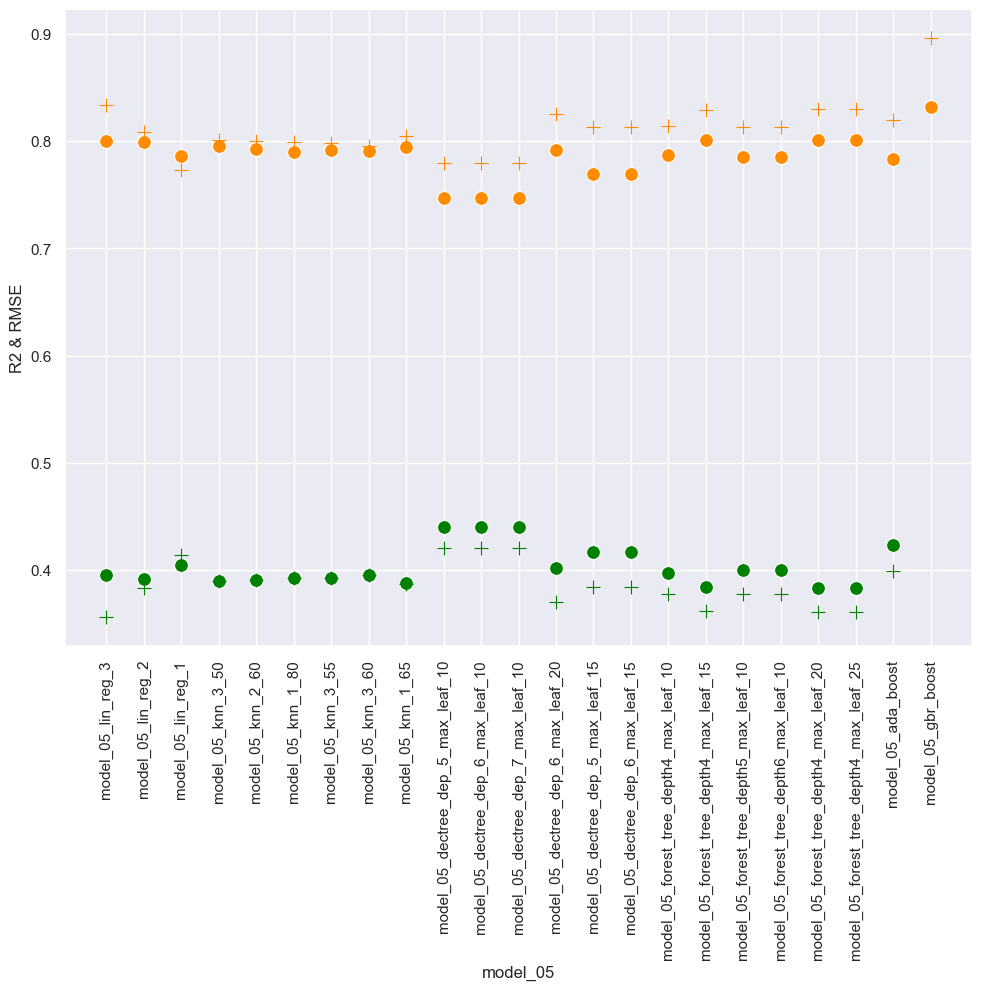

In [89]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_mae', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
g.set(xlabel=model_name)
plt.show();

In [90]:
error_df.to_csv(f'../data/Metrics_Summary_{model_name}.txt', index=False)